# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

as well as an

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:

import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

%matplotlib inline

In [2]:
!pwd

/Users/AakashSharma/Documents/DSI/Submissions/Project1/code


## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [3]:
# Let's import the SAT 2017 data & set that to the variable sat.
sat = pd.read_csv("/Users/AakashSharma/Documents/DSI/Submissions/Project1/Data/sat_2017.csv")

In [4]:
# Let's import the ACT 2017 data & set that to the variable ACT.
act = pd.read_csv("/Users/AakashSharma/Documents/DSI/Submissions/Project1/Data/act_2017.csv")

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [5]:
# Prints the 1st 10 rows of the SAT dataframe
sat.iloc[:10]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [6]:
# Prints the 1st 10 rows of the ACT dataframe
act.iloc[:10]

,State,Participation,English,Math,Reading,Science,Composite
0,Alabama,100%,18.9,18.4,19.7,19.4,19.2
1,Alaska,65%,18.7,19.8,20.4,19.9,19.8
2,Arizona,62%,18.6,19.8,20.1,19.8,19.7
3,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
4,California,31%,22.5,22.7,23.1,22.2,22.8
5,Colorado,100%,20.1,20.3,21.2,20.9,20.8
6,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
7,Delaware,18%,24.1,23.4,24.8,23.6,24.1
8,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2
9,Florida,73%,19.0,19.4,21.0,19.4,19.8


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

#### Answer: 
The 1st data frame contains a state, the percentage in which that state participated, a score for reading/writing & math, & a calculated column based on the total of the subjects

In [7]:
# We can use .describe method to see that statistical numbers of the SAT 2017 data set.
sat.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [8]:
# We can use .describe method to see that statistical numbers of the ACT 2017 data set.
act.describe()

,English,Math,Reading,Science
count,51.000000,51.000000,51.000000,51.000000
mean,20.931373,21.182353,22.013725,21.041176
std,2.353677,1.981989,2.067271,3.182463
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.450000,19.900000
50%,20.700000,20.900000,21.800000,21.300000
75%,23.300000,23.100000,24.150000,22.750000
max,25.500000,25.300000,26.000000,24.900000


#### 4a. Does the data look complete? 

In [9]:
# Let's see if there is any null or empty values in the data set for the 2017 SAT.
sat.isnull().head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [10]:
# Let's see if there is any null or empty values in the data set for the 2017 ACT.
act.isnull().head()

,State,Participation,English,Math,Reading,Science,Composite
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


#### Answer: 
There are no missing values, if you use the data from with isnull() you'll see that all values are False meaning that there is not imcomplete null values listed otherwise it would be True. However, the data has incorrect data types which is problematic. 

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

#### Answer:
The minimum possible value for a subtest or subject for the ACT would be 2.3 in the Science field. The maximum value would be 26 in the reading category for the ACT. The SAT has a high max value of 1295 & a min value score overall of 950. Respectively, the SAT has a min of 52 for the math,  & a max of 651 both of which stands out more than the reading/writing sections.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [11]:
# The ACT 'Composite' column as an error with the score.
# Let's remove the unnecessary value & make it a float number.
act.loc[50, 'Composite'] = 20.2

In [12]:
# The SAT 'Math' column as an error with the score.
# Let's remove the error & make it a float number.
sat.loc[20, 'Math'] = 520

In [13]:
# The national row of the act data frame is unnecessary since we're comparing states giving 2 different exams
# act = act.drop([0], axis = 0)

#### 5. What are your data types? 
Display the data types of each feature. 

In [14]:
# We can see the type of the dataframe for the SAT. It's correct. 
type(sat)

pandas.core.frame.DataFrame

In [15]:
# Let's see the types of the columns of the SAT data frame, this will determine what values can
    # be stored in the proper columns.
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [16]:
# We can see the type of the dataframe for the ACT. It's correct. 
type(act)

pandas.core.frame.DataFrame

In [17]:
# Let's see the types of the columns of the ACT data frame, this will determine what values can
    # be stored in the proper columns.
act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
State            51 non-null object
Participation    51 non-null object
English          51 non-null float64
Math             51 non-null float64
Reading          51 non-null float64
Science          51 non-null float64
Composite        51 non-null object
dtypes: float64(4), object(3)
memory usage: 2.9+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

#### Answer:
The types for each column are odd. I mean if we decide to combine these data frames, we will have an issue converting string objects to floats or integers. Some numbers are integers but stored as a type float. Even the last index of the ACT exam has a float with a string letter attached to it but stored as a 'float' type.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [18]:
# Let's convert the 'Composite' column of the ACT 2017 dataset to a type float for consistency.
act['Composite'] = act['Composite'].astype(float)

In [19]:
# Let's remove any unnecessary characters from the 'Particpation' column of the SAT 2017 dataset
sat['Participation'] = sat['Participation'].str.replace("%","")

In [20]:
# Let's convert the 'Participation' column of the SAT 2017 dataset to a type float for consistency.
sat['Participation'] = sat['Participation'].astype(float)

In [21]:
# Let's remove any unnecessary characters from the 'Participation' column of the ACT 2017 dataset
act['Participation'] = act['Participation'].str.replace("%","")

In [22]:
# Let's convert the 'Participation' column of the ACT 2017 dataset to a type float for consistency.
act['Participation'] = act['Participation'].astype(float)

- Fix any individual values preventing other columns from being the appropriate type.

In [23]:
# Let's convert the 'Evidence-Based Reading and Writing' column of the SAT 2017 dataset to a type float for consistency.
sat['Evidence-Based Reading and Writing'] = sat['Evidence-Based Reading and Writing'].astype(float)

In [24]:
# Let's convert the 'Math' column of the SAT 2017 dataset to a type float for consistency.
sat['Math'] = sat['Math'].astype(float)

In [25]:
# Let's convert the 'Total' column of the SAT 2017 dataset to a type float for consistency.
sat['Total'] = sat['Total'].astype(float)

- Finish your data modifications by making sure the columns are now typed appropriately.

- Display the data types again to confirm they are correct.

In [26]:
# Let's make sure our changes actually occured & are correct.
sat.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing    float64
Math                                  float64
Total                                 float64
dtype: object

In [27]:
# Let's make sure our changes actually occured & are correct.
act.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [28]:
# We want to rename the columns for consistency, we take our old columns & seperate them
    # by the colon. Anything after that is our renamed columns.
# This is for the SAT 2017 dataframe.
sat.rename(columns = {'State': 'States', 
                      'Participation': 'sat_participation_2017',
                      'Evidence-Based Reading and Writing': 'sat_ebrw_2017',
                      'Math': 'sat_math_2017', 
                      'Total': 'sat_total_2017'},
inplace = True)

In [29]:
# We want to rename the columns for consistency, we take our old columns & seperate them
    # by the colon. Anything after that is our renamed columns.
# This is for the ACT 2017 dataframe.
act.rename(columns = {'State': 'act_states', 
                      'Participation': 'act_participation_2017',
                      'English': 'act_english_2017',
                      'Math': 'act_math_2017',
                      'Reading': 'act_reading_2017',
                      'Science': 'act_science_2017',
                      'Composite': 'act_total_2017'},
inplace = True)

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Data Set|Description|
|---|---|---|---|
|sat_states_2017|object|SAT|Location of SAT exams for students in 2017|
|sat_participation_2017|float|SAT|Amount of students who took the exam in 2017| 
|sat_ebrw_2017|integer|SAT|Overall score of english & writing portion in 2017|
|sat_math_2017|integer|SAT|Overall score of math portion in 2017|
|sat_total_2017|integer|SAT|Total score of states combined in 2017|
|act_states_2017| object|ACT|Location of ACT exams for students in 2017|
|act_participation_2017|float|ACT|Amount of students who took the exam in 2017|
|act_english_2017|float|ACT|Overall score of english portion in 2017|
|act_math_2017| float|ACT|Overall score of math portion in 2017|
|act_reading_2017|float|ACT|Overall score of reading portion in 2017|
|act_science_2017|float|ACT|Overall score of science portion in 2017|
|act_total_2017|float|ACT|Overall score of composite exam in 2017|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

###### Answer:
Already dropped 'The National' row

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [30]:
# Now we want to combine the datasets into 1 giant data frame.
# We use .concat of the pandas utility to do so, dropping any duplicate columns & reseting the index.
# This is set to a named variable 'combined_2017'.
combined_2017 = pd.concat([sat, act], axis = 1).drop_duplicates().reset_index(drop = True)

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [31]:
pwd

'/Users/AakashSharma/Documents/DSI/Submissions/Project1/code'

In [32]:
# Now lets convert that into a csv file to be used later.
combined_2017.to_csv("/Users/AakashSharma/Documents/DSI/Submissions/Project1/data/combined_2017.csv")

In [33]:
combined_2017.head()

,States,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_states,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_total_2017
0,Alabama,5.0,593.0,572.0,1165.0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547.0,533.0,1080.0,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563.0,553.0,1116.0,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3.0,614.0,594.0,1208.0,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
4,California,53.0,531.0,524.0,1055.0,California,31.0,22.5,22.7,23.1,22.2,22.8


## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [34]:
#Imports:

import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [35]:
# Let's import the SAT 2018 data & set that to the variable 'sat_2018'.
sat_2018 = pd.read_csv("/Users/AakashSharma/Documents/DSI/Submissions/Project1/Data/sat_2018.csv")

In [36]:
# Let's import the ACT 2018 data & set that to the variable 'act_2018'.
act_2018 = pd.read_csv("/Users/AakashSharma/Documents/DSI/Submissions/Project1/Data/act_2018.csv")

In [37]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [38]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
State                    51 non-null object
Participation            51 non-null float64
Composite                51 non-null float64
Average English Score    51 non-null float64
Average Math Score       51 non-null float64
Average Reading Score    51 non-null float64
Average Science Score    51 non-null float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


In [39]:
# Let's convert the 'Evidence-Based Reading and Writing' column of the SAT 2018 dataset to a type float for consistency.
sat_2018['Evidence-Based Reading and Writing'] = sat_2018['Evidence-Based Reading and Writing'].astype(float)

In [40]:
# Let's convert the 'Math' column of the SAT 2018 dataset to a type float for consistency.
sat_2018['Math'] = sat_2018['Math'].astype(float)

In [41]:
# Let's convert the 'Total' column of the SAT 2018 dataset to a type float for consistency.
sat_2018['Total'] = sat_2018['Total'].astype(float)

|Feature|Type|Data Set|Description|
|---|---|---|---|
|sat_states_2018|object|SAT|Location of SAT exams for students in 2018|
|sat_participation_2018|float|SAT|Amount of students who took the exam in 2018| 
|sat_ebrw_2018|float|SAT|Overall score of english & writing portion in 2018|
|sat_math_2018|float|SAT|Overall score of math portion in 2018|
|sat_total_2018|float|SAT|Total score of states combined in 2018|
|act_states_2018| object|ACT|Location of ACT exams for students in 2018|
|act_participation_2018|float|ACT|Amount of students who took the exam in 2018|
|act_english_2018|float|ACT|Overall score of english portion in 2018|
|act_math_2018| float|ACT|Overall score of math portion in 2018|
|act_reading_2018|float|ACT|Overall score of reading portion in 2018|
|act_science_2018|float|ACT|Overall score of science portion in 2018|
|act_total_2018|float|ACT|Overall score of composite exam in 2018|

In [42]:
# We want to rename the columns for consistency, we take our old columns & seperate them
    # by the colon. Anything after that is our renamed columns.
# This is for the SAT 2018 dataframe.
sat_2018.rename(columns = {
    'State': 'sat_states_2018', 
    'Participation': 'sat_participation_2018',
    'Evidence-Based Reading and Writing': 'sat_ebrw_2018',
    'Math': 'sat_math_2018', 
    'Total': 'sat_total_2018'},
inplace = True)

In [43]:
# We want to rename the columns for consistency, we take our old columns & seperate them
    # by the colon. Anything after that is our renamed columns.
# This is for the ACT 2018 dataframe.
act_2018.rename(columns = {
    'State': 'act_states_2018', 
    'Participation': 'act_participation_2018',
    'Average English Score': 'act_english_2018',
    'Average Math Score': 'act_math_2018',
    'Average Reading Score': 'act_reading_2018',
    'Average Science Score': 'act_science_2018',
    'Composite': 'act_total_2018'},
inplace = True)

In [44]:
# Now we want to combine the datasets into 1 giant data frame.
# We use .concat of the pandas utility to do so, dropping any duplicate columns & reseting the index.
# This is set to a named variable 'combined_2018'.
combined_2018 = pd.concat([sat_2018, act_2018], axis = 1).drop_duplicates().reset_index(drop = True)

In [45]:
# Now lets convert that into a csv file to be used later.
combined_2018.to_csv("/Users/AakashSharma/Documents/DSI/Submissions/Project1/data/combined_2018.csv")

In [46]:
combined_2018.head()

,sat_states_2018,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_states_2018,act_participation_2018,act_total_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
0,Alabama,0.06,595.0,571.0,1166.0,Alabama,1.00,19.1,18.9,18.3,19.6,19.0
1,Alaska,0.43,562.0,544.0,1106.0,Alaska,0.33,20.8,19.8,20.6,21.6,20.7
2,Arizona,0.29,577.0,572.0,1149.0,Arizona,0.66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,0.05,592.0,576.0,1169.0,Arkansas,1.00,19.4,19.1,18.9,19.7,19.4
4,California,0.60,540.0,536.0,1076.0,California,0.27,22.7,22.5,22.5,23.0,22.1


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [47]:
# Now we want to combine the 2 2017 & 2018 datasets into 1 giant data frame.
# We refernce our combined 2017 & combined 2018 datasets.
# We use .concat of the pandas utility to do so, dropping any duplicate columns & reseting the index.
# This is set to a named variable 'combined_2018'.
final = pd.concat([combined_2017, combined_2018], axis = 1).drop_duplicates().reset_index(drop = True)

In [48]:
final

,States,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_states,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,...,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_states_2018,act_participation_2018,act_total_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
0,Alabama,5.0,593.0,572.0,1165.0,Alabama,100.0,18.9,18.4,19.7,...,595.0,571.0,1166.0,Alabama,1.00,19.1,18.9,18.3,19.6,19.0
1,Alaska,38.0,547.0,533.0,1080.0,Alaska,65.0,18.7,19.8,20.4,...,562.0,544.0,1106.0,Alaska,0.33,20.8,19.8,20.6,21.6,20.7
2,Arizona,30.0,563.0,553.0,1116.0,Arizona,62.0,18.6,19.8,20.1,...,577.0,572.0,1149.0,Arizona,0.66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,3.0,614.0,594.0,1208.0,Arkansas,100.0,18.9,19.0,19.7,...,592.0,576.0,1169.0,Arkansas,1.00,19.4,19.1,18.9,19.7,19.4
4,California,53.0,531.0,524.0,1055.0,California,31.0,22.5,22.7,23.1,...,540.0,536.0,1076.0,California,0.27,22.7,22.5,22.5,23.0,22.1
5,Colorado,11.0,606.0,595.0,1201.0,Colorado,100.0,20.1,20.3,21.2,...,519.0,506.0,1025.0,Colorado,0.30,23.9,23.9,23.2,24.4,23.5
6,Connecticut,100.0,530.0,512.0,1041.0,Connecticut,31.0,25.5,24.6,25.6,...,535.0,519.0,1053.0,Connecticut,0.26,25.6,26.0,24.8,26.1,24.9
7,Delaware,100.0,503.0,492.0,996.0,Delaware,18.0,24.1,23.4,24.8,...,505.0,492.0,998.0,Delaware,0.17,23.8,23.7,23.1,24.5,23.4
8,District of Columbia,100.0,482.0,468.0,950.0,District of Columbia,32.0,24.4,23.5,24.9,...,497.0,480.0,977.0,District of columbia,0.32,23.6,23.7,22.7,24.4,23.0
9,Florida,83.0,520.0,497.0,1017.0,Florida,73.0,19.0,19.4,21.0,...,550.0,549.0,1099.0,Florida,0.66,19.9,19.2,19.3,21.1,19.5


In [49]:
# We have to drop the unnecessay columns that will display duplicates, we only want 1 states column.
final = final.drop(['act_states', 'sat_states_2018', 'act_states_2018'], axis=1)

In [50]:
 # Now lets convert that into a csv file to be used later.
final.to_csv("/Users/AakashSharma/Documents/DSI/Submissions/Project1/data/final.csv")

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [51]:
# Creates a quick overview of the numeric features of the 'final' dataframe.
final.describe()

,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_total_2017,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_total_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,556.803922,1126.098039,65.254902,20.931373,21.182353,22.013725,21.041176,21.519608,0.457451,563.686275,556.235294,1120.019608,0.617255,21.496078,20.988235,21.125490,22.015686,21.345098
std,35.276632,45.666901,47.180513,92.494812,32.140842,2.353677,1.981989,2.067271,3.182463,2.020695,0.373143,47.502627,47.772623,94.155083,0.340371,2.111583,2.446356,2.035765,2.167245,1.870114
min,2.000000,482.000000,468.000000,950.000000,8.000000,16.300000,18.000000,18.100000,2.300000,17.800000,0.020000,480.000000,480.000000,977.000000,0.070000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,4.000000,533.500000,522.000000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.900000,19.800000,0.045000,534.500000,522.500000,1057.500000,0.285000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,0.520000,552.000000,544.000000,1098.000000,0.660000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,22.750000,23.600000,0.775000,610.500000,593.500000,1204.000000,1.000000,23.650000,23.700000,23.150000,24.100000,23.050000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,1.000000,643.000000,655.000000,1298.000000,1.000000,25.600000,26.000000,25.200000,26.100000,24.900000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [52]:
# Let's create multiple functions to find the statistical information of the data set.
# This function helps calculate the mean.
def mean(data):
    return float(sum(data) / len(data))
# This function helps calculate the variance based off of the mean of the data set.
def variance(data):
    mu = mean(data)
    return mean([(x - mu) ** 2 for x in data])
# This function helps calculate the standard deviation based off of the mean & variance of the data set.
def std_dev(data):
    return (variance(data)) ** 0.5

In [53]:
# Dictionary comprehension can be used to do this for the 'final' data set.
sd = {i: std_dev(final[i]) for i in final.columns[1:]}
sd

{'sat_participation_2017': 34.92907076664508,
 'sat_ebrw_2017': 45.21697020437866,
 'sat_math_2017': 46.71566878587415,
 'sat_total_2017': 91.58351056778743,
 'act_participation_2017': 31.824175751231806,
 'act_english_2017': 2.3304876369363363,
 'act_math_2017': 1.9624620273436781,
 'act_reading_2017': 2.0469029314842646,
 'act_science_2017': 3.151107895464408,
 'act_total_2017': 2.000786081581989,
 'sat_participation_2018': 0.3694661922353942,
 'sat_ebrw_2018': 47.03460978357609,
 'sat_math_2018': 47.30194550378352,
 'sat_total_2018': 93.22742384464433,
 'act_participation_2018': 0.33701735820410317,
 'act_total_2018': 2.090779082141178,
 'act_english_2018': 2.4222536143202795,
 'act_math_2018': 2.015707255555717,
 'act_reading_2018': 2.145891884510421,
 'act_science_2018': 1.8516885484833543}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

##### Answer:
Yes, in some cases I rounded them up though

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

#### Which states have the highest and lowest participation rates for the:

##### 2017 SAT?

In [54]:
# Participation rates of the 2017 SAT.
final.sort_values(by = ['sat_participation_2017'], ascending = True).head()

,States,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_total_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
34,North Dakota,2.0,635.0,621.0,1256.0,98.0,19.0,20.4,20.5,20.6,...,0.02,640.0,643.0,1283.0,0.98,20.3,19.1,20.3,20.7,20.5
24,Mississippi,2.0,634.0,607.0,1242.0,100.0,18.2,18.1,18.8,18.8,...,0.03,630.0,606.0,1236.0,1.00,18.6,18.2,18.1,18.9,18.6
15,Iowa,2.0,641.0,635.0,1275.0,67.0,21.2,21.3,22.6,22.1,...,0.03,634.0,631.0,1265.0,0.68,21.8,21.0,21.2,22.5,22.0
25,Missouri,3.0,640.0,631.0,1271.0,100.0,19.8,19.9,20.8,20.5,...,0.04,633.0,629.0,1262.0,1.00,20.0,19.5,19.7,20.5,20.0
44,Utah,3.0,624.0,614.0,1238.0,100.0,19.5,19.9,20.8,20.6,...,0.04,480.0,530.0,1010.0,1.00,20.4,19.7,19.9,20.9,20.5


##### 2018 SAT?

In [55]:
# Participation rates of the 2018 SAT.
final.sort_values(by = ['sat_participation_2018'], ascending = True).head()

,States,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_total_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
34,North Dakota,2.0,635.0,621.0,1256.0,98.0,19.0,20.4,20.5,20.6,...,0.02,640.0,643.0,1283.0,0.98,20.3,19.1,20.3,20.7,20.5
50,Wyoming,3.0,626.0,604.0,1230.0,100.0,19.4,19.8,20.8,20.6,...,0.03,633.0,625.0,1257.0,1.00,20.0,19.0,19.7,20.6,20.3
41,South Dakota,3.0,612.0,603.0,1216.0,80.0,20.7,21.5,22.3,22.0,...,0.03,622.0,618.0,1240.0,0.77,21.9,20.8,21.6,22.4,22.2
27,Nebraska,3.0,629.0,625.0,1253.0,84.0,20.9,20.9,21.9,21.5,...,0.03,629.0,623.0,1252.0,1.00,20.1,19.4,19.8,20.4,20.1
49,Wisconsin,3.0,642.0,649.0,1291.0,100.0,19.7,20.4,20.6,20.9,...,0.03,641.0,653.0,1294.0,1.00,20.5,19.8,20.3,20.6,20.8


##### 2017 ACT?

In [56]:
# Participation rates of the 2017 ACT.
final.sort_values(by = ['act_participation_2017'], ascending = True).head()

,States,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_total_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
19,Maine,95.0,513.0,499.0,1012.0,8.0,24.2,24.0,24.8,23.7,...,0.99,512.0,501.0,1013.0,0.07,24.0,23.8,23.6,24.7,23.4
29,New Hampshire,96.0,532.0,520.0,1052.0,18.0,25.4,25.1,26.0,24.9,...,0.96,535.0,528.0,1063.0,0.16,25.1,25.1,24.7,25.6,24.4
7,Delaware,100.0,503.0,492.0,996.0,18.0,24.1,23.4,24.8,23.6,...,1.00,505.0,492.0,998.0,0.17,23.8,23.7,23.1,24.5,23.4
39,Rhode Island,71.0,539.0,524.0,1062.0,21.0,24.0,23.3,24.7,23.4,...,0.97,513.0,505.0,1018.0,0.15,24.2,24.4,23.6,25.0,23.5
38,Pennsylvania,65.0,540.0,531.0,1071.0,23.0,23.4,23.4,24.2,23.3,...,0.70,547.0,539.0,1086.0,0.20,23.5,23.3,23.2,24.0,23.1


##### 2018 ACT?

In [57]:
# Participation rates of the 2017 ACT.
final.sort_values(by = ['act_participation_2018'], ascending = True).head()

,States,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_total_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
19,Maine,95.0,513.0,499.0,1012.0,8.0,24.2,24.0,24.8,23.7,...,0.99,512.0,501.0,1013.0,0.07,24.0,23.8,23.6,24.7,23.4
39,Rhode Island,71.0,539.0,524.0,1062.0,21.0,24.0,23.3,24.7,23.4,...,0.97,513.0,505.0,1018.0,0.15,24.2,24.4,23.6,25.0,23.5
29,New Hampshire,96.0,532.0,520.0,1052.0,18.0,25.4,25.1,26.0,24.9,...,0.96,535.0,528.0,1063.0,0.16,25.1,25.1,24.7,25.6,24.4
7,Delaware,100.0,503.0,492.0,996.0,18.0,24.1,23.4,24.8,23.6,...,1.00,505.0,492.0,998.0,0.17,23.8,23.7,23.1,24.5,23.4
38,Pennsylvania,65.0,540.0,531.0,1071.0,23.0,23.4,23.4,24.2,23.3,...,0.70,547.0,539.0,1086.0,0.20,23.5,23.3,23.2,24.0,23.1


### Which states have the highest and lowest mean total/composite scores for the:

##### Highest & Lowest for SAT 2017

Lowest for 2017 SAT: 950 in DC.....Highest for 2017 SAT: 1295 in Minnesota

In [58]:
# Highest total scores for the SAT 2017.
final.sort_values(by = ['sat_total_2017'], ascending = True).head()

,States,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_total_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
8,District of Columbia,100.0,482.0,468.0,950.0,32.0,24.4,23.5,24.9,23.5,...,0.92,497.0,480.0,977.0,0.32,23.6,23.7,22.7,24.4,23.0
7,Delaware,100.0,503.0,492.0,996.0,18.0,24.1,23.4,24.8,23.6,...,1.00,505.0,492.0,998.0,0.17,23.8,23.7,23.1,24.5,23.4
12,Idaho,93.0,513.0,493.0,1005.0,38.0,21.9,21.8,23.0,22.1,...,1.00,508.0,493.0,1001.0,0.36,22.3,21.9,21.6,23.2,22.1
22,Michigan,100.0,509.0,495.0,1005.0,29.0,24.1,23.7,24.5,23.8,...,1.00,511.0,499.0,1011.0,0.22,24.2,24.5,23.9,24.7,23.9
19,Maine,95.0,513.0,499.0,1012.0,8.0,24.2,24.0,24.8,23.7,...,0.99,512.0,501.0,1013.0,0.07,24.0,23.8,23.6,24.7,23.4


In [59]:
# Lowest total scores for the SAT 2017.
final.sort_values(by = ['sat_total_2017'], ascending = True).tail()

,States,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_total_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
16,Kansas,4.0,632.0,628.0,1260.0,73.0,21.1,21.3,22.3,21.7,...,0.04,633.0,631.0,1265.0,0.71,21.6,21.0,21.1,22.3,21.5
25,Missouri,3.0,640.0,631.0,1271.0,100.0,19.8,19.9,20.8,20.5,...,0.04,633.0,629.0,1262.0,1.00,20.0,19.5,19.7,20.5,20.0
15,Iowa,2.0,641.0,635.0,1275.0,67.0,21.2,21.3,22.6,22.1,...,0.03,634.0,631.0,1265.0,0.68,21.8,21.0,21.2,22.5,22.0
49,Wisconsin,3.0,642.0,649.0,1291.0,100.0,19.7,20.4,20.6,20.9,...,0.03,641.0,653.0,1294.0,1.00,20.5,19.8,20.3,20.6,20.8
23,Minnesota,3.0,644.0,651.0,1295.0,100.0,20.4,21.5,21.8,21.6,...,0.04,643.0,655.0,1298.0,0.99,21.3,20.2,21.4,21.7,21.4


##### Highest & Lowest for ACT 2017

In [60]:
# Highest total scores for the ACT 2017.
final.sort_values(by = ['act_total_2017'], ascending = True).head()

,States,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_total_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
28,Nevada,26.0,563.0,553.0,1116.0,100.0,16.3,18.0,18.1,18.2,...,0.23,574.0,566.0,1140.0,1.00,17.7,16.6,17.8,18.0,17.9
24,Mississippi,2.0,634.0,607.0,1242.0,100.0,18.2,18.1,18.8,18.8,...,0.03,630.0,606.0,1236.0,1.00,18.6,18.2,18.1,18.9,18.6
40,South Carolina,50.0,543.0,521.0,1064.0,100.0,17.5,18.6,19.1,18.9,...,0.55,547.0,523.0,1070.0,1.00,18.3,17.3,18.2,18.6,18.5
11,Hawaii,55.0,544.0,541.0,1085.0,90.0,17.8,19.2,19.2,19.3,...,0.56,480.0,530.0,1010.0,0.89,18.9,18.2,19.0,19.1,19.0
33,North Carolina,49.0,546.0,535.0,1081.0,100.0,17.8,19.3,19.6,19.3,...,0.52,554.0,543.0,1098.0,1.00,19.1,18.0,19.3,19.5,19.2


In [61]:
# Lowest total scores for the ACT 2017.
final.sort_values(by = ['act_total_2017'], ascending = True).tail()

,States,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_total_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
8,District of Columbia,100.0,482.0,468.0,950.0,32.0,24.4,23.5,24.9,23.5,...,0.92,497.0,480.0,977.0,0.32,23.6,23.7,22.7,24.4,23.0
19,Maine,95.0,513.0,499.0,1012.0,8.0,24.2,24.0,24.8,23.7,...,0.99,512.0,501.0,1013.0,0.07,24.0,23.8,23.6,24.7,23.4
6,Connecticut,100.0,530.0,512.0,1041.0,31.0,25.5,24.6,25.6,24.6,...,1.00,535.0,519.0,1053.0,0.26,25.6,26.0,24.8,26.1,24.9
21,Massachusetts,76.0,555.0,551.0,1107.0,29.0,25.4,25.3,25.9,24.7,...,0.80,562.0,563.0,1125.0,0.25,25.5,25.5,25.2,25.9,24.7
29,New Hampshire,96.0,532.0,520.0,1052.0,18.0,25.4,25.1,26.0,24.9,...,0.96,535.0,528.0,1063.0,0.16,25.1,25.1,24.7,25.6,24.4


##### Highest & Lowest Values for SAT 2018

In [62]:
# Highest total scores for the SAT 2018.
final.sort_values(by = ['sat_total_2018'], ascending = True).head()

,States,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_total_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
8,District of Columbia,100.0,482.0,468.0,950.0,32.0,24.4,23.5,24.9,23.5,...,0.92,497.0,480.0,977.0,0.32,23.6,23.7,22.7,24.4,23.0
7,Delaware,100.0,503.0,492.0,996.0,18.0,24.1,23.4,24.8,23.6,...,1.00,505.0,492.0,998.0,0.17,23.8,23.7,23.1,24.5,23.4
48,West Virginia,14.0,558.0,528.0,1086.0,69.0,20.0,19.4,21.2,20.5,...,0.28,513.0,486.0,999.0,0.65,20.3,19.8,19.4,21.3,20.4
12,Idaho,93.0,513.0,493.0,1005.0,38.0,21.9,21.8,23.0,22.1,...,1.00,508.0,493.0,1001.0,0.36,22.3,21.9,21.6,23.2,22.1
44,Utah,3.0,624.0,614.0,1238.0,100.0,19.5,19.9,20.8,20.6,...,0.04,480.0,530.0,1010.0,1.00,20.4,19.7,19.9,20.9,20.5


In [63]:
# Lowest total scores for the SAT 2018.
final.sort_values(by = ['sat_total_2018'], ascending = True).tail()

,States,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_total_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
16,Kansas,4.0,632.0,628.0,1260.0,73.0,21.1,21.3,22.3,21.7,...,0.04,633.0,631.0,1265.0,0.71,21.6,21.0,21.1,22.3,21.5
15,Iowa,2.0,641.0,635.0,1275.0,67.0,21.2,21.3,22.6,22.1,...,0.03,634.0,631.0,1265.0,0.68,21.8,21.0,21.2,22.5,22.0
34,North Dakota,2.0,635.0,621.0,1256.0,98.0,19.0,20.4,20.5,20.6,...,0.02,640.0,643.0,1283.0,0.98,20.3,19.1,20.3,20.7,20.5
49,Wisconsin,3.0,642.0,649.0,1291.0,100.0,19.7,20.4,20.6,20.9,...,0.03,641.0,653.0,1294.0,1.00,20.5,19.8,20.3,20.6,20.8
23,Minnesota,3.0,644.0,651.0,1295.0,100.0,20.4,21.5,21.8,21.6,...,0.04,643.0,655.0,1298.0,0.99,21.3,20.2,21.4,21.7,21.4


##### Highest & Lowest for 2018 ACT

In [64]:
# Highest total scores for the ACT 2018.
final.sort_values(by = ['act_total_2018'], ascending = True).head()

,States,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_total_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
28,Nevada,26.0,563.0,553.0,1116.0,100.0,16.3,18.0,18.1,18.2,...,0.23,574.0,566.0,1140.0,1.00,17.7,16.6,17.8,18.0,17.9
40,South Carolina,50.0,543.0,521.0,1064.0,100.0,17.5,18.6,19.1,18.9,...,0.55,547.0,523.0,1070.0,1.00,18.3,17.3,18.2,18.6,18.5
24,Mississippi,2.0,634.0,607.0,1242.0,100.0,18.2,18.1,18.8,18.8,...,0.03,630.0,606.0,1236.0,1.00,18.6,18.2,18.1,18.9,18.6
11,Hawaii,55.0,544.0,541.0,1085.0,90.0,17.8,19.2,19.2,19.3,...,0.56,480.0,530.0,1010.0,0.89,18.9,18.2,19.0,19.1,19.0
0,Alabama,5.0,593.0,572.0,1165.0,100.0,18.9,18.4,19.7,19.4,...,0.06,595.0,571.0,1166.0,1.00,19.1,18.9,18.3,19.6,19.0


In [65]:
# Lowest total scores for the ACT 2018.
final.sort_values(by = ['act_total_2018'], ascending = True).tail()

,States,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_total_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
22,Michigan,100.0,509.0,495.0,1005.0,29.0,24.1,23.7,24.5,23.8,...,1.00,511.0,499.0,1011.0,0.22,24.2,24.5,23.9,24.7,23.9
32,New York,67.0,528.0,523.0,1052.0,31.0,23.8,24.0,24.6,23.9,...,0.79,534.0,534.0,1068.0,0.27,24.5,24.2,24.2,24.9,24.2
29,New Hampshire,96.0,532.0,520.0,1052.0,18.0,25.4,25.1,26.0,24.9,...,0.96,535.0,528.0,1063.0,0.16,25.1,25.1,24.7,25.6,24.4
21,Massachusetts,76.0,555.0,551.0,1107.0,29.0,25.4,25.3,25.9,24.7,...,0.80,562.0,563.0,1125.0,0.25,25.5,25.5,25.2,25.9,24.7
6,Connecticut,100.0,530.0,512.0,1041.0,31.0,25.5,24.6,25.6,24.6,...,1.00,535.0,519.0,1053.0,0.26,25.6,26.0,24.8,26.1,24.9


###### Do any states with 100% participation on a given test have a rate change year-to-year?

In [66]:
# States of the  2018 SAT & ACT participation that had less than 50% rate.
final[(final['sat_participation_2017'] == 100) & (final['sat_participation_2018'] < 100)]

,States,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_total_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
6,Connecticut,100.0,530.0,512.0,1041.0,31.0,25.5,24.6,25.6,24.6,...,1.00,535.0,519.0,1053.0,0.26,25.6,26.0,24.8,26.1,24.9
7,Delaware,100.0,503.0,492.0,996.0,18.0,24.1,23.4,24.8,23.6,...,1.00,505.0,492.0,998.0,0.17,23.8,23.7,23.1,24.5,23.4
8,District of Columbia,100.0,482.0,468.0,950.0,32.0,24.4,23.5,24.9,23.5,...,0.92,497.0,480.0,977.0,0.32,23.6,23.7,22.7,24.4,23.0
22,Michigan,100.0,509.0,495.0,1005.0,29.0,24.1,23.7,24.5,23.8,...,1.00,511.0,499.0,1011.0,0.22,24.2,24.5,23.9,24.7,23.9


###### Do any states show have >50% participation on *both* tests either year?

In [67]:
# States of the  2017 SAT & ACT participation that had less than 50% rate.
final[(final['sat_participation_2017'] < 50) & (final['act_participation_2017'] < 50)]

,States,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_total_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
37,Oregon,43.0,560.0,548.0,1108.0,40.0,21.2,21.5,22.4,21.7,...,0.48,564.0,553.0,1117.0,0.42,21.3,20.6,20.9,21.9,21.1


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

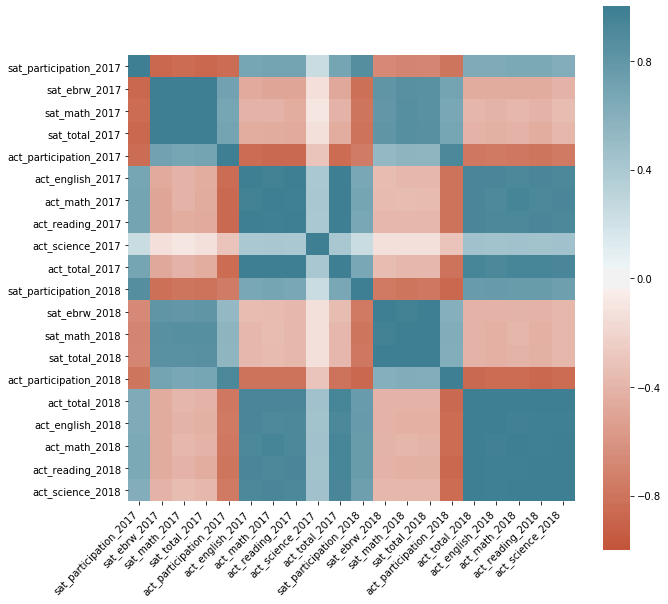

In [68]:
# Let's create a heatmap to showcase the correlation of all the columns & corresponding data
plt.figure(figsize = (10, 10))
corr = final.corr()
ax = sns.heatmap(
    corr,
    vmin = -1, vmax = 1, center = 0,
    cmap = sns.diverging_palette(20, 220, n = 200),
    square = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'
);

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [69]:
# Here's a function cell for subplotting a bunch of histograms within 1 frame.
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (10, 10)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # plots the subplots
        ax[i].set_title(list_of_titles[i]) # adds a title to each subplot
        ax[i].set_xlabel(list_of_xlabels[i]) # adds the x axis labels
        ax[i].set_ylabel('Number of States') # adds the y axis, which will always be a distribution of a number states 
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

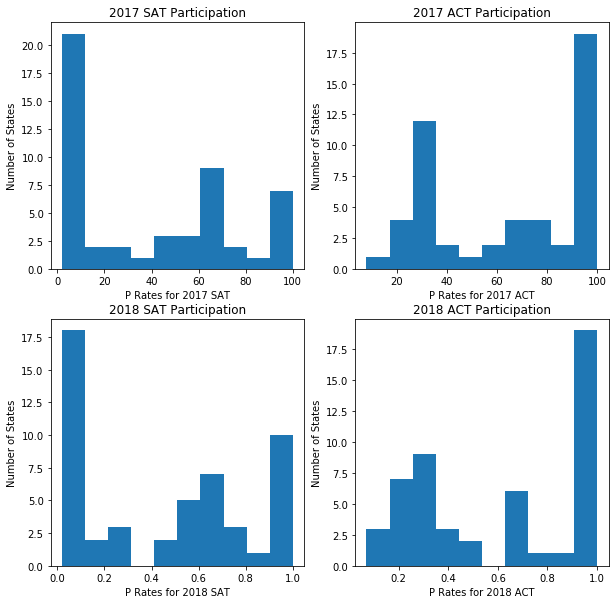

In [86]:
# Let's apply our function to the participation rates of both exams in both years.
subplot_histograms(final, ['sat_participation_2017', 'act_participation_2017', 
                           'sat_participation_2018', 'act_participation_2018'], 
                   ['2017 SAT Participation', '2017 ACT Participation', 
                    '2018 SAT Participation', '2018 ACT Participation'], 
                   ['P Rates for 2017 SAT', 'P Rates for 2017 ACT', 
                    'P Rates for 2018 SAT', 'P Rates for 2018 ACT'])

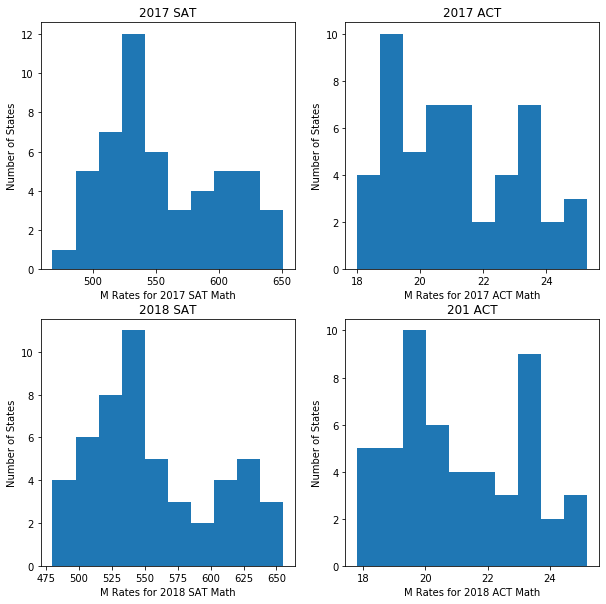

In [87]:
# Let's apply our function to the math scores of both exams in both years.
subplot_histograms(final, ['sat_math_2017', 'act_math_2017', 
                           'sat_math_2018', 'act_math_2018'], 
                   ['2017 SAT', '2017 ACT', '2018 SAT', '201 ACT'], 
                   ['M Rates for 2017 SAT Math', 'M Rates for 2017 ACT Math', 
                    'M Rates for 2018 SAT Math', 'M Rates for 2018 ACT Math'])

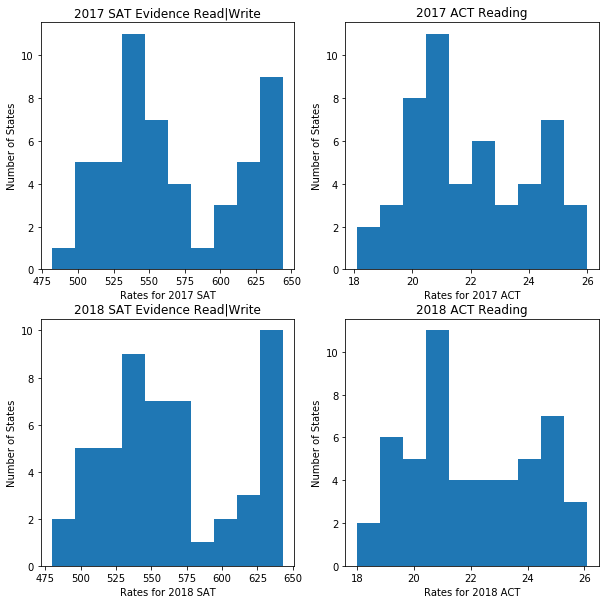

In [72]:
# Let's apply our function to the Reading & Writing scores of both exams in both years.
subplot_histograms(final, ['sat_ebrw_2017', 'act_reading_2017', 
                           'sat_ebrw_2018', 'act_reading_2018'], 
                   ['2017 SAT Evidence Read|Write', '2017 ACT Reading', 
                    '2018 SAT Evidence Read|Write', '2018 ACT Reading'], 
                   ['Rates for 2017 SAT', 'Rates for 2017 ACT', 
                    'Rates for 2018 SAT', 'Rates for 2018 ACT'])

#### Plot and interpret scatter plots

For each of the following:

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [73]:
# Creates a function that helps us graph our scatter plots
def subplot_scatters (x_value, y_value, dataframe):
    scatterplots = sns.scatterplot(x = x_value, y = y_value, data = final)

- ###### SAT vs. ACT math scores for 2017

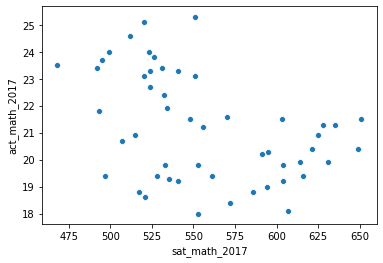

In [74]:
# Correlation of the SAT vs ACT 2017 math scores.
subplot_scatters('sat_math_2017', 'act_math_2017', final)

- ###### SAT vs. ACT verbal/reading scores for 2017

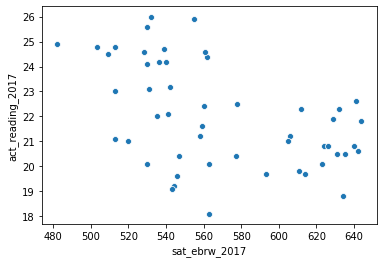

In [75]:
# Correlation of the SAT vs ACT 2017 verbal/reading scores.
subplot_scatters('sat_ebrw_2017', 'act_reading_2017', final)

- ###### SAT vs. ACT total/composite scores for 2017

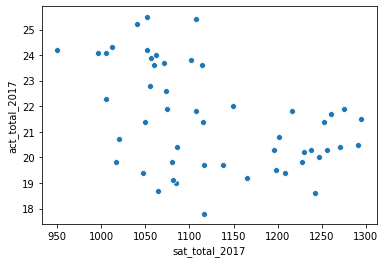

In [76]:
# Correlation of the SAT vs ACT 2017 total scores.
subplot_scatters('sat_total_2017', 'act_total_2017', final)

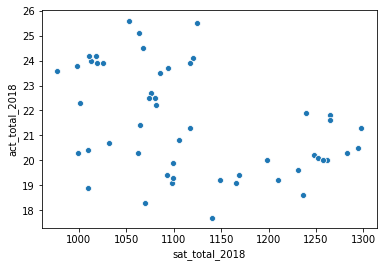

In [77]:
# Correlation of the SAT vs ACT 2018 total scores.
subplot_scatters('sat_total_2018', 'act_total_2018', final)

- ###### Total scores for SAT 2017 vs. 2018

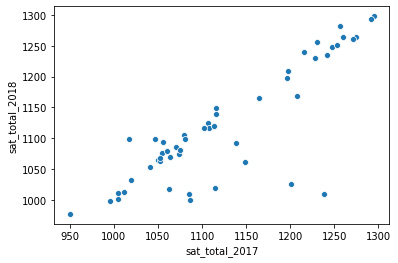

In [78]:
# Correlation of the SAT 2017 va 2018 total scores.
subplot_scatters('sat_total_2017', 'sat_total_2018', final)

- ###### Composite scores for ACT 2017 vs. 2018

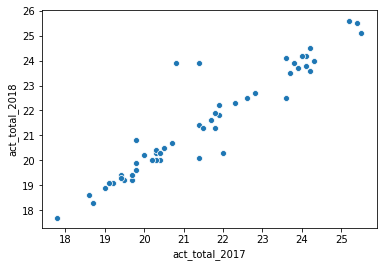

In [79]:
# Correlation of the ACT 2017 vs 2018 total scores.
subplot_scatters('act_total_2017', 'act_total_2018', final)

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [80]:
#def boxplot_function(dataframe, ylabels = '', xlabels = ''):
 #   fig, axes = plt.subplots(2,2)    sns.boxplot(data = dataframe, ax = ax, orient="h")                               
  #  plt.yticks(range(len(list_of_xlabels), fontsize = 12)
   #            ax.set_yticklabels(xlabels, fontsize = 12)
    #           ax.set_xlabel('Number of States')                      

In [81]:
final.columns

Index(['States', 'sat_participation_2017', 'sat_ebrw_2017', 'sat_math_2017',
       'sat_total_2017', 'act_participation_2017', 'act_english_2017',
       'act_math_2017', 'act_reading_2017', 'act_science_2017',
       'act_total_2017', 'sat_participation_2018', 'sat_ebrw_2018',
       'sat_math_2018', 'sat_total_2018', 'act_participation_2018',
       'act_total_2018', 'act_english_2018', 'act_math_2018',
       'act_reading_2018', 'act_science_2018'],
      dtype='object')

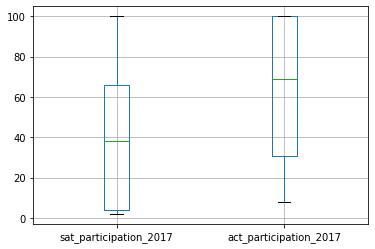

In [82]:
# Creates a boxplot based off of the SAT & ACT participation rates of 2017.
particpation_2017 = final.boxplot(column = ['sat_participation_2017', 'act_participation_2017'])

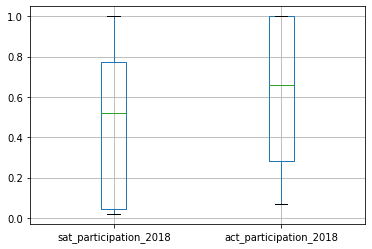

In [83]:
# Creates a boxplot based off of the SAT & ACT participation rates of 2018.
particpation_2018 = final.boxplot(column = ['sat_participation_2018', 'act_participation_2018'])

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.
 
 
 
 Talk about things like mean, median, mode of 1 or 2 columns, describe the distribution of the graph

#### Answers:
- I would categorize most of my data as being data types of floats & string objects. This can play out in which types can be measured based on others. So to do this we need to determine that float data types are continuous where as the string objects are categorized by the 50 States, which won't change numerically, so that would be discrete. Depending on size and type of data, understanding and interpreting data sets can be challenging. It’s impossible to understand the data set and make conclusions just looking at the first or randomly selected 100 observations from millions of them.

- We can dive deeper & determine the distribution for the data for a specified exam in a specified year. These statistics could help us narrow down a more specified area such as a local neighborhood in proximity to a good high school that hosts, and teaches these students the skills they need for either the SAT or ACT.

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

##### Answer:
We see it only for the exams that true to other similar exams. Math of SAT 2017 would better correspond with the Math 2018 SAT, we can't compare the SAT to the ACT and expect a normal distribution due to the different exams, and particpation rates with those exams. 

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

##### Answer:
Realistically speaking, we would need a better population size specified in the time a student takes each exam & the respective sections. We can the gauge how they did on both exams as well as how they studied for either or for both exams. We can also see the relationship between classes that emphasize skill sets that the exams cover or reading/writing skills which can then be compared to whether a student is stronger in 1 skill than the other. 

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

##### Answer:
I think it would be great to compare the ACT math score of 2017 against the 2018 math score but that doesn't mean that the same student is going to do just as well or even worse if they took the SAT math score. Both are different set of problems, concepts leading to both being scored differently. We can only do this if we have a column of students that took both exams & we had the scores for their respective seections. 

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [84]:
from scipy.stats import ttest_ind

In [85]:
# Statistical evaluation of Distributions based off of the SAT 2017 vs 2018 math scores.
ttest_ind(final['sat_math_2017'], final['sat_math_2018'])

Ttest_indResult(statistic=0.06047977285310038, pvalue=0.9518942316821304)

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

##### Answer:
I chose Minnesota, Virginia, & Wyoming. Wyoming had low participation in SAT in 2017 & a low participation for 2018 in SAT however they had a high participation for 2017 ACT & an extremely low participation from the previous year in 2018. Virginia had a moderate participation rate for SAT & ACT in 2017 both dropping a few percentages in 2018. Minnesota had a 3%, extremely low participation for the SAT in 2017 with a 1% increase in 2018 & however the ACT participation fell in 2018 versus the 100% participation in 2017.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

##### Answer:
Alabama had a low participation rate in the 2017 SAT over the 2017 ACT. This could be that most colleges in the South prefer the ACT to the SAT, however most colleges nowadays prefer both. The College Board could up the requirement & need for the SAT & set that equivalent to the need for the ACT. Most students don't want to take 2 different exams that are both 4 hours long but with the right preparation, participation can increase, & so can the urge for students to take the exam. If they're more prepped, the chance of them knowing the topics will likely have them excel on the SAT or give them the nudge to try it out versus someone who has no background in the exam. Having it as a requirement for most colleges along with the ACT could help push students prepare for the exam. And since the SAT is similar in layout & topics compared to the ACT, they will have no excuse not to do well. More data would be great in studying & analyzing if the requirement for both exams with the proper preparation compared to one student not taking 1 exam out of the 2, how they study for it. This really could give us insight on how a student prepares for the exam as well.